<span style="font-size: 35px; font-weight: bold;">
<center>
Linear Regression with One-Dimensional Feature 📊<br>
Auto Insurance in Sweden
</center>
</span>





### About Dataset
X = number of claims <br>
Y = total payment for all the claims in thousands of Swedish Kronor
#### Context <br>
In the following data<br>
X = number of claims<br>
Y = total payment for all the claims in thousands of Swedish Kronor<br>
for geographical zones in Sweden<br>
Reference: Swedish Committee on Analysis of Risk Premium in Motor Insurance<br>
http://college.hmco.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html<br>
<br>
#### Content<br>
What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.<br>
<br>
#### Acknowledgements<br>
We wouldn't be here without the help of others. If you owe any attributions or thanks, include them here along with any citations of past research.<br>
<br>


--> Import libraries 

In [97]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

--> read and know data

In [98]:
df = pd.read_csv('swedish_insurance.csv')
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       63 non-null     int64  
 1   Y       63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [100]:
df.describe()

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


In [101]:
# check for nulls 
print('Null values in DataSet:\n', df.isnull().sum())
# check for duplicates
print('Duplicate values in DataSet:', df.duplicated().sum())

Null values in DataSet:
 X    0
Y    0
dtype: int64
Duplicate values in DataSet: 0


--> plot and visulaizing  the data

`Scatter plot`

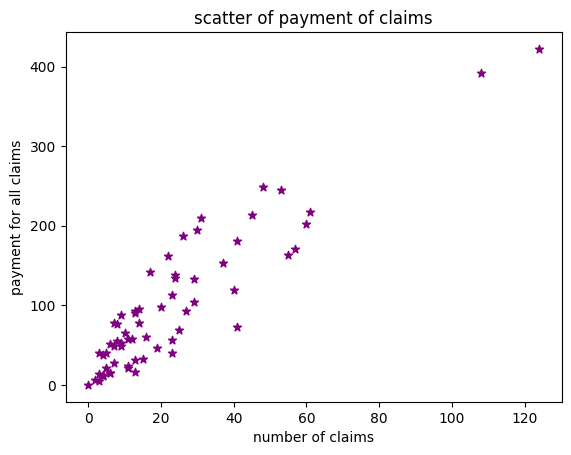

In [102]:
# plot the amount and the payment scatter plot 
plt.scatter(df.X,df.Y,color= 'purple', marker= '*')
# plt.plot(df.X,df.Y,color='blue',marker = '*', linestyle='')
plt.title('scatter of payment of claims')
plt.xlabel('number of claims')
plt.ylabel('payment for all claims')
plt.show()

`Histogram`

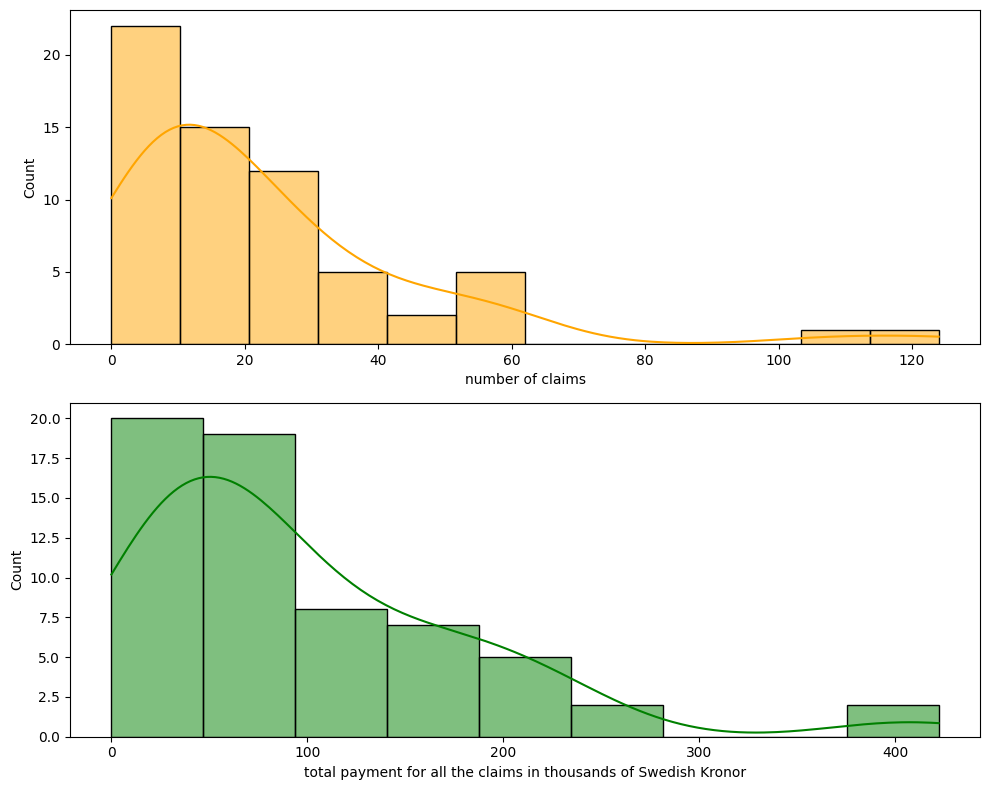

In [103]:
# Histogram of number of claims , X
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.histplot(df, x='X',kde=True, color='orange')
plt.xlabel('number of claims')
# Histogram of payment  , Y
plt.subplot(2,1,2)
sns.histplot(df, x='Y', kde=True,color='green')
plt.xlabel('total payment for all the claims in thousands of Swedish Kronor')

plt.tight_layout()
plt.show()


`BoxPlot `

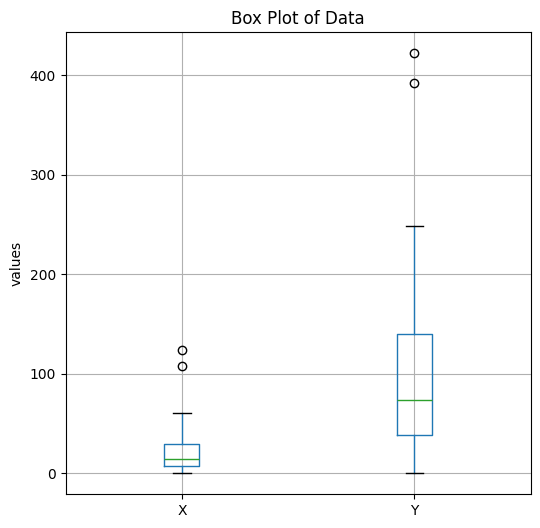

In [104]:
# Check for Outliers
plt.figure(figsize=(6,6))
df.boxplot()
plt.title('Box Plot of Data')
plt.ylabel('values')
plt.grid(True)
plt.show()

--> Handling Outliers 

In [105]:
# Remove outliers for Claims col
min_range_cl = df.X.mean() - 3*df.X.std()
max_range_cl = df.X.mean() + 3*df.X.std()
df[df.X <= max_range_cl]
# remove outliers for payment col
min_range_pay = df.Y.mean() - 3*df.Y.std()
max_range_pay = df.Y.mean() + 3*df.Y.std()
df[df.Y <= max_range_pay]

 

,X,Y
1,19,46.2
2,13,15.7
4,40,119.4
5,57,170.9
6,23,56.9
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


#### --> Model training 

Step 1: Separating features (X) and target (y)


In [106]:
# split the data [80% train, 20% test]
X = df['X'].values.reshape(-1,1)  # Reshape to make it 2D: [[10], [20], [30], ...]
Y = df['Y']

Step 2: Splitting the dataset into training and testing sets


In [107]:
x_train,x_test ,y_train,y_test= train_test_split(X,Y,test_size=0.2, random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
# Resetting the index to ignore the original indexing
# x_train = x_train.reset_index(drop=True)
# x_test = x_test.reset_index(drop=True)
# y_train = y_train.reset_index(drop=True)
# y_test = y_test.reset_index(drop=True)

(50, 1) (13, 1) (50,) (13,)


Step 3: Training a basic LINEAR REGRESSION model 

In [108]:
# create linear regression object 
linear_reg_model = LinearRegression() 
#  fit the model with data , training 
linear_reg_model.fit(x_train,y_train)


LinearRegression()

Step 4: Making predictions on the test set


In [114]:
y_pred_test = linear_reg_model.predict(x_test)

Step 5: Making Predictions on the X

In [115]:
y_pred = linear_reg_model.predict(X)

y = mx + b <br>
when training , we try to find best values for m and b

In [110]:
print("cofficient, m = ",linear_reg_model.coef_[0] ) #m
print("intercept,  b = ",linear_reg_model.intercept_) #b

cofficient, m =  3.4292342915288745
intercept,  b =  16.75023759857541


Step 6: Evaluating the model's performance


In [121]:
mse = mean_squared_error(y_test, y_pred_test) #Mean Squared Error
r2 = r2_score(y_test,y_pred_test) # R-squared score 
rmse = np.sqrt(mse) # square root of mse 

In [112]:
# print('Test Set Features:')
# print(x_test)
# print('\n True Test  lables:')
# print(y_test)
# print('\n Predicted Test Lables')
# print(y_pred)

print(f"\n Mean Squared Error :{mse:0.2f}")
print(f"\n R-squared Score {r2: 0.2f}")
print(f"\n square Root of mse:  {rmse:0.2f}")
print("\nAccuarcy Score" , linear_reg_model.score(x_test,y_test)*100,'%')



 Mean Squared Error :875.04

 R-squared Score  0.90

 square Root of mse:  29.58

Accuarcy Score 89.50819493918402 %


* R2 : This indicates that 90% of the variance in the target variable is explained by the feature.
* Interpretation of RMS:
    - Target Range: 124.00 to 422.20
    - RMSE: 29.56
    - The RMSE of 29.56 is about 7.1% of the total range of the target variable (which is 298.20).
* Conclusion:
    - Whether this is good or bad depends on the specific context and acceptable error margins for your application.

--> plot the model result

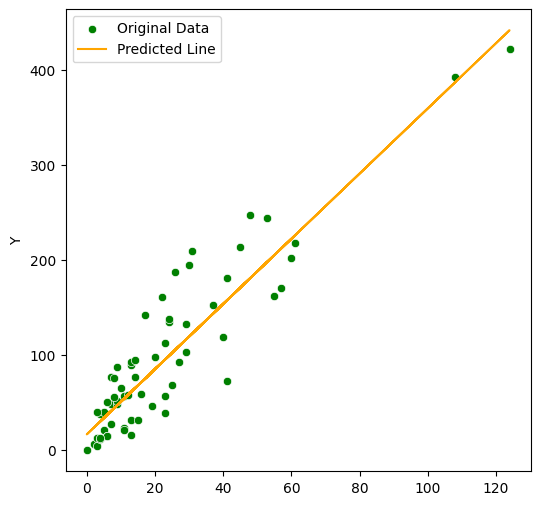

In [120]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,x=df.X.ravel(),y='Y',color = 'green')
plt.plot(X,y_pred, color='Orange')
plt.legend(['Original Data','Predicted Line'])
plt.show()

- Results <br>
    --> Test Set Features: Displays the feature values used for testing. <br>
    --> True Test Labels: Shows the actual target values for the test set.<br>
    --> Predicted Test Labels: Contains the target values predicted by the model.<br>
    --> Mean Squared Error (MSE): Measures the average squared difference between the actual and predicted values. <br>

        A lower MSE indicates better model performance. 
    --> R-squared Score: Represents the proportion of variance in the target variable that is predictable from the <br>
    
        feature. A score of 1.00 indicates a perfect fit.

 - Notes: <br>
    * Feature Reshaping: Even if X has only one feature, it must be reshaped to a 2D array using .values.reshape(-1, 1). <br>
    * Model Performance Metrics: MSE and R-squared are used to evaluate the accuracy and goodness of fit of the linear regression model.<br>